In [ ]:
pip install pandas-datareader

In [ ]:
import pandas_datareader as pdr
import datetime
import pandas as pd


start = datetime.datetime(2018,1,1)
end = datetime.datetime(2020,12,29)
print(start,end)

2018-01-01 00:00:00 2020-12-29 00:00:00


In [ ]:
stock = ['INFY']
data = pdr.DataReader(stock,'stooq',str(start.date()),str(end.date())).stack('Symbols')
data.head()

,Attributes,Close,High,Low,Open,Volume
Date,Symbols,,,,,
2020-12-29,INFY,16.1916,16.3270,16.1052,16.3270,8.771338e+06
2020-12-28,INFY,16.2014,16.2681,16.1522,16.1620,4.388148e+06
2020-12-24,INFY,16.0364,16.1238,15.9599,16.1140,1.367021e+06
2020-12-23,INFY,16.0266,16.3555,16.0021,16.3270,6.121234e+06
2020-12-22,INFY,16.0168,16.1719,15.8047,15.8341,6.950295e+06


In [ ]:
newData = data.reset_index()
newData.to_csv('IBN_stock_2018_to_2024.csv')


In [ ]:
data = pd.read_csv('/content/IBN_stock_2018_to_2024.csv')
data.head()

,Unnamed: 0,Date,Symbols,Close,High,Low,Open,Volume
0,0,2020-12-29,INFY,16.1916,16.3270,16.1052,16.3270,8.771338e+06
1,1,2020-12-28,INFY,16.2014,16.2681,16.1522,16.1620,4.388148e+06
2,2,2020-12-24,INFY,16.0364,16.1238,15.9599,16.1140,1.367021e+06
3,3,2020-12-23,INFY,16.0266,16.3555,16.0021,16.3270,6.121234e+06
4,4,2020-12-22,INFY,16.0168,16.1719,15.8047,15.8341,6.950295e+06


In [ ]:
data.set_index('Date',inplace=True)
data.head()

,Unnamed: 0,Symbols,Close,High,Low,Open,Volume
Date,,,,,,,
2020-12-29,0,INFY,16.1916,16.3270,16.1052,16.3270,8.771338e+06
2020-12-28,1,INFY,16.2014,16.2681,16.1522,16.1620,4.388148e+06
2020-12-24,2,INFY,16.0364,16.1238,15.9599,16.1140,1.367021e+06
2020-12-23,3,INFY,16.0266,16.3555,16.0021,16.3270,6.121234e+06
2020-12-22,4,INFY,16.0168,16.1719,15.8047,15.8341,6.950295e+06


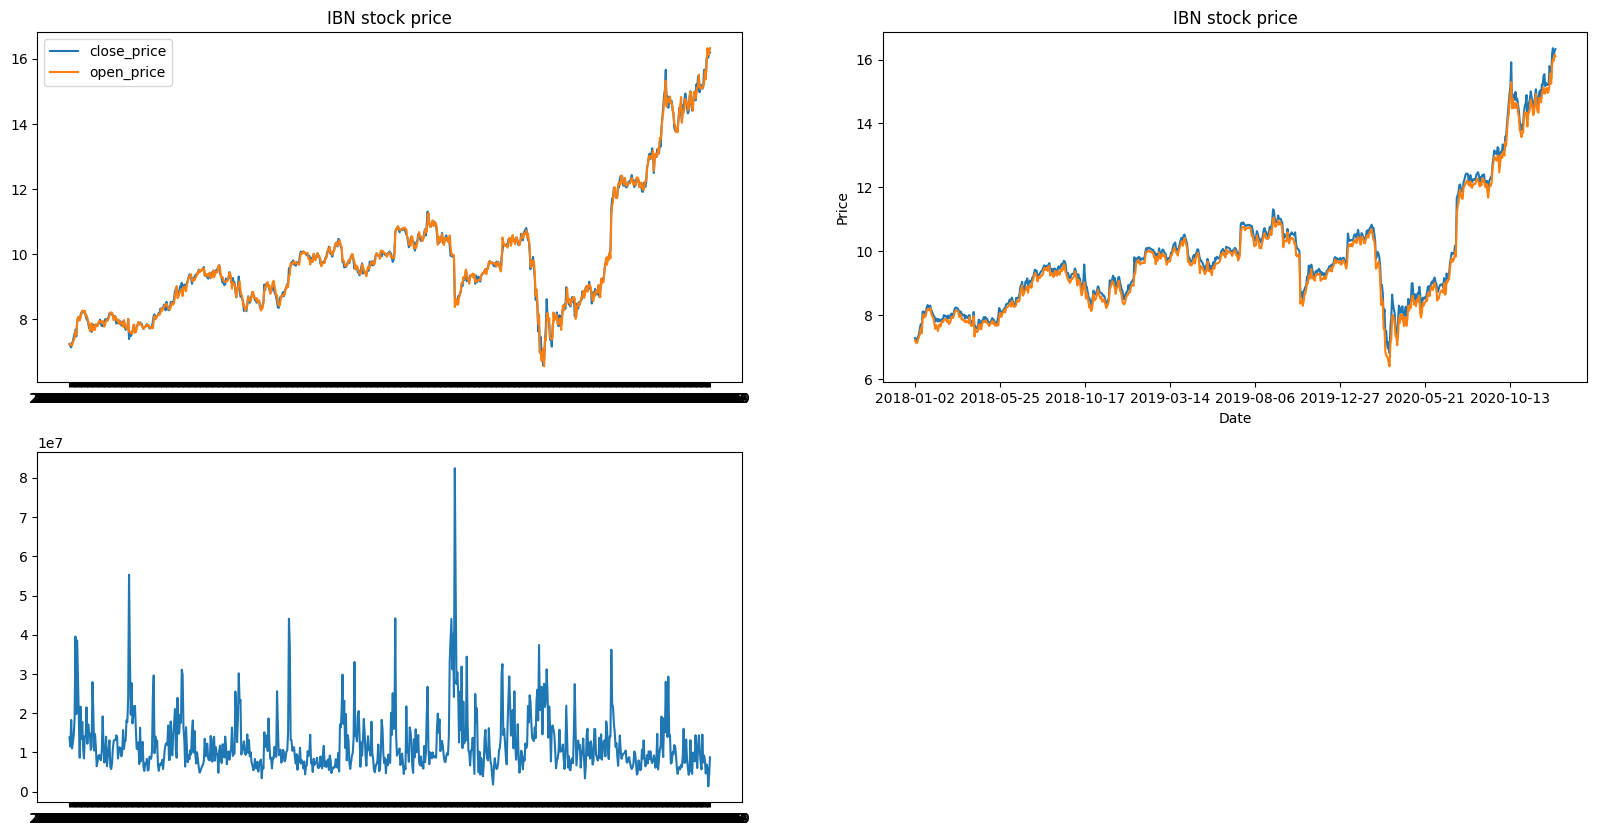

In [ ]:
import matplotlib.pyplot as plt
plt.figure(1,(20,10))
newData=data.iloc[::-1]
plt.subplot(2,2,1)
close_price = newData['Close']
plt.plot(close_price,label='close_price')
open = newData['Open']
plt.plot(open,label='open_price')
plt.legend()
plt.title('IBN stock price')



plt.subplot(2,2,2)
high=newData['High']
low = newData['Low']
high.plot(xlabel='Date',ylabel='Price',label='IBN',title='IBN stock price')
low.plot(xlabel='Date',ylabel='Price',label='IBN',title='IBN stock price')




plt.subplot(2,2,3)
volume = newData['Volume']
plt.plot(volume,label='volume')

In [ ]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 754 entries, 2018-01-02 to 2020-12-29
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  754 non-null    int64  
 1   Symbols     754 non-null    object 
 2   Close       754 non-null    float64
 3   High        754 non-null    float64
 4   Low         754 non-null    float64
 5   Open        754 non-null    float64
 6   Volume      754 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 47.1+ KB


In [ ]:
from statsmodels.tsa import seasonal,arima_model
import statsmodels.api as st
import pandas as pd
import numpy as np

<Axes: xlabel='Date'>

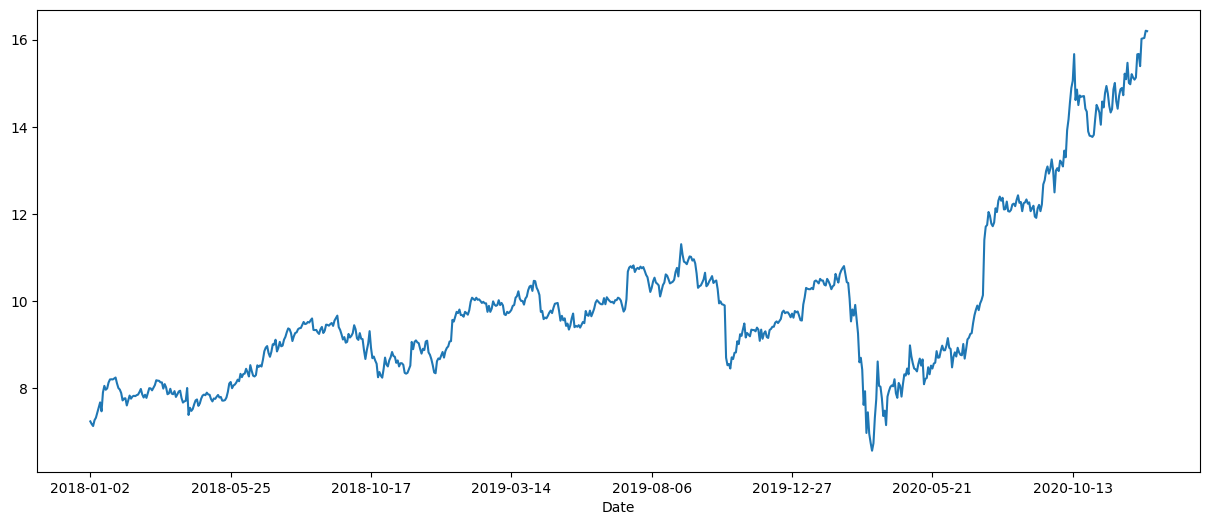

In [ ]:
import matplotlib.pyplot as plt
newData['Close'].plot(figsize=(15,6))

Text(0.5, 1.0, 'Residual')

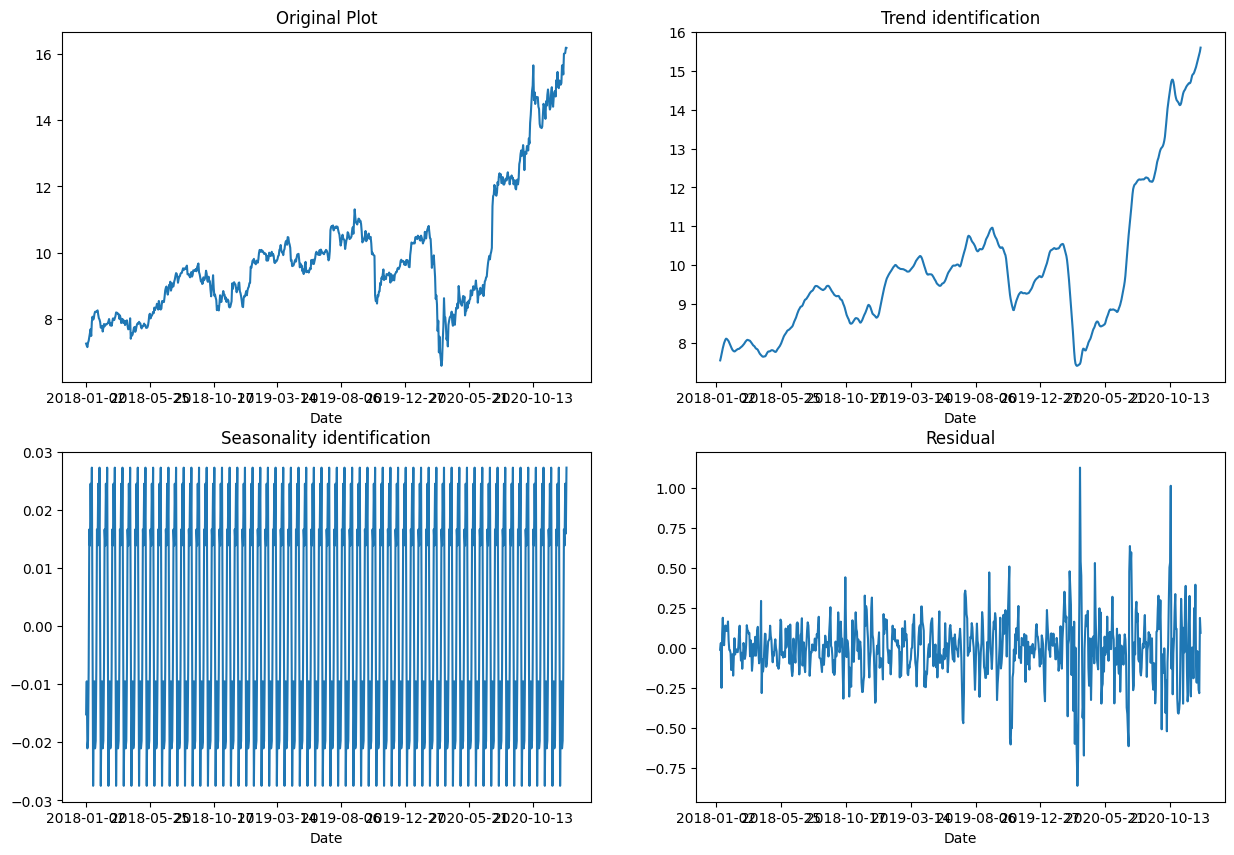

In [ ]:
tempData = newData['Close']


OrigData = tempData.copy()

var = seasonal.seasonal_decompose(tempData,period=12)
plt.figure(1,(15,10))
plt.subplot(2,2,1)
var.observed.plot()
plt.title('Original Plot')
plt.subplot(2,2,2)
var.trend.plot()
plt.title('Trend identification')

plt.subplot(2,2,3)
var.seasonal.plot()
plt.title('Seasonality identification')

plt.subplot(2,2,4)
var.resid.plot()
plt.title('Residual')




In [ ]:
sarima_model = st.tsa.statespace.SARIMAX(tempData,order=(1,1,1),seasonal_order=(1,1,1,12))
# train the model
sarima_model = sarima_model.fit()

# forecaste the value
value_for= sarima_model.forecast()
print(value_for)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


754    16.201673
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
tempData = data['Close']
num_samples = 30

for i in range(num_samples):
  sarima_model = st.tsa.statespace.SARIMAX(tempData,order=(1,1,1),seasonal_order=(1,1,1,12))
  # train the model
  sarima_model = sarima_model.fit()
  # forecast the value
  value_for= sarima_model.forecast()
  tempData = pd.concat([tempData, value_for])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [ ]:
tempData.head()

2020-12-29    16.1916
2020-12-28    16.2014
2020-12-24    16.0364
2020-12-23    16.0266
2020-12-22    16.0168
dtype: float64

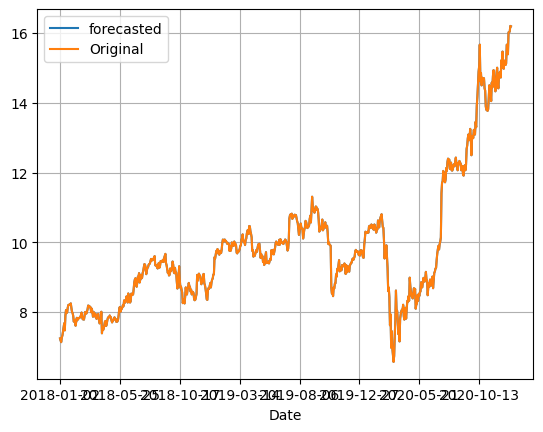

In [ ]:
plt.figure(1)
tempData.plot(label='forecasted')
OrigData.plot(label='Original')
plt.legend()
plt.grid('on')

In [ ]:
pip install pandas-datareader